In [1]:
import numpy as np
import matplotlib.pyplot as plt
from etc import PlanExposure

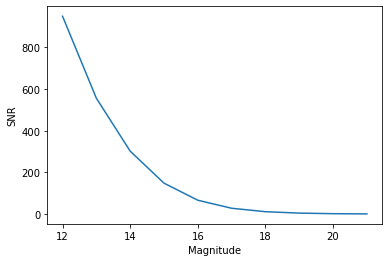

In [2]:
# Specify parameters in an input parameter file
filename = "./etc_param.txt"

# Plot SNR vs magnitude at the predefined exposure time in the parameter file
magrange=np.arange(12,22) # AB magnitudes
plan = PlanExposure(filename)
srcrate, snr = plan.plot_snr(magrange)
plt.gca()
plt.yscale('linear')

In [3]:
import pandas as pd

In [4]:
print('Exposure time: {} s'.format(plan.exptime))
print('Sky Rate: {:.1f} e/s/pix'.format(plan.calc_sky_noise()))

df = pd.DataFrame({'AB_Magnitude': magrange,'~VegMag': magrange-1.85, 'Src count rate (e/s)': srcrate, 'SNR': snr})
df['Src count rate (e/s)'] = df['Src count rate (e/s)'].round(1)
df['SNR'] = df['SNR'].round(1)
df

Exposure time: 300.0 s
Sky Rate: 350.7 e/s/pix


,AB_Magnitude,~VegMag,Src count rate (e/s),SNR
0,12,10.15,3362.4,949.3
1,13,11.15,1338.6,555.8
2,14,12.15,532.9,302.0
3,15,13.15,212.2,148.3
4,16,14.15,84.5,66.4
5,17,15.15,33.6,27.9
6,18,16.15,13.4,11.4
7,19,17.15,5.3,4.6
8,20,18.15,2.1,1.8
9,21,19.15,0.8,0.7


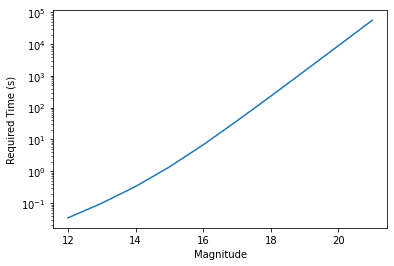

In [5]:
# Plot exposure time needed to reach a given SNR 
times = plan.plot_exptime(magrange,snr_desired=10)

In [6]:
# Saving parameter files from this notebook

# # Example data with values and corresponding labels
# parameters = np.array([1,300,1.20E-04,0.9,
#                    15,50,1.80E-05,2048,
#                    0.9,0.26,0.95,0.98,
#                    5.00E-03,4,4.00E-02,
#                    1,2.38E-06,2.26E-07])

# labels = np.array(['Coadds','Frame Time [s]','Sky Brightness [Jy]','Focal Length [m]',
#                    'Read Noise [e/s]','Dark Current [e/s]','Pixel Size [m]', 'Num of pixels on edge',
#                    'Quantum efficiency','Aperture diameter [m]','Average sky transmission','Filter throughpout',
#                    'Transmission loss per surface','Number of transmission losses','Loss per rfelction','Number of reflections',
#                    'Central wavelength [m]','Passband [m]'])

# # Combine values and labels into a structured array
# paramfile = np.rec.fromarrays([parameters, labels], names=('Value', 'Label'))

# # Save the structured array to a file
# #np.savetxt(filename, paramfile, fmt='%s', delimiter='\t')
# #print("File saved successfully.")